### Colab Activity 14.2: Examining Purity

**Expected Time = 60 minutes**


By default, the metric in the `DecisionTreeClassifier` is the Gini Criterion.  This assigment introduces its use through a basic example.  Your goal is to minimize the impurity based on a range of split options.  In the following assignment you will explore the alternative notion of `entropy` that can also be used as a criterion.  


#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

### Gini Impurity

The Gini Criterion is used to identify the optimal place to make a decision for classification based on the purity of the results.  This is measured by a weighted sum of the node size and gini impurity of each split node defined as:

$$\sum_{k}p_{mk}(1 - p_{mk})$$

where 

$$p_{mk} = \frac{1}{N_m} \sum_{y \in Q_m} I(y = k)$$

and $Q_m$ is the data at node $m$ with $N_m$ samples.  [source](https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation)

### The Data

Below, a small sample from the built in `titanic` dataset is loaded and displayed.  The classification problem is to predict survival on the ship.  You will use the `age` (age of passenger) and `pclass` (passenger class) features to explore the gini splitting criterion.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split

In [4]:
# titanic = sns.load_dataset('titanic')[['age', 'pclass', 'survived']].head()

#import urllib

titanic = None

# try:
#     titanic = sns.load_dataset('titanic')
# except:
#     titanic_dataset_uri = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
#     with urllib.request.urlopen(titanic_dataset_uri) as response:
#         titanic = pd.read_csv(response)
#load titanic dataset from local file
titanic = pd.read_csv('data/titanic.csv')

titanic = titanic[['age', 'pclass', 'survived']].head()

In [5]:
titanic

,age,pclass,survived
0,22.0,3,0
1,38.0,1,1
2,26.0,3,1
3,35.0,1,1
4,35.0,3,0


The **GINI IMPURITY** of the original data is:

$$ 1 - (\frac{3}{5})^2 - (\frac{2}{5})^2$$

In [6]:
1 - (3/5)**2 - (2/5)**2

0.48

### Problem 1

#### Split on Passenger Class


To begin, consider the information in the data based on splitting the `pclass` column.  Compute the Gini Impurity of the left and right side of the split as `gini_pclass1` and `gini_pclass3` below.  Remember that to compute the gini impurity means:

$$1 - P(\text{survived})^2 - P(\text{neither survived})^2$$

In [7]:


gini_pclass1 = ''
gini_pclass3 = ''

# Problem 1
# For pclass=1: 2 records, both survived
gini_pclass1 = 1 - (2/2)**2 - (0/2)**2  # = 0.0

# For pclass=3: 3 records, 1 survived, 2 not survived
gini_pclass3 = 1 - (1/3)**2 - (2/3)**2  # ≈ 0.44


# Answer check
print(f'Left node: {gini_pclass1: .2f}\nRight Node: {gini_pclass3: .2f}')

Left node:  0.00
Right Node:  0.44


### Problem 2

#### Computing the Gini Impurity for Passenger Class



Now, to compute the Gini Impurity of the split we find a weighted average of the gini impurities for each leaf node.  These represent the proportion of data in each node times the gini impurity.  

$$\text{Gini Impurity} = \frac{2}{5} \times \text{gini\_pclass1} + \frac{3}{5} \times \text{gini\_pclass3}$$

In [8]:


gini_imp_pclass = ''

# Problem 2
# Weighted average: (2/5 * gini_pclass1) + (3/5 * gini_pclass3)
gini_imp_pclass = (2/5 * 0.0) + (3/5 * 0.44)  # ≈ 0.267


# Answer check
print(gini_imp_pclass)

0.264


### Problem 3

#### Splitting on `age` < 23



Compute the gini impurity for each node below and determine the gini impurity of the split by the comparison `age < 23`.  Assign your answers as `under_23_gini`, `over_23_gini`, and `gini_imp_age` below.

In [9]:


under_23_gini = ''
over_23_gini = ''
gini_imp_age = ''

# Problem 3
# For age<23: 1 record, not survived
under_23_gini = 1 - (0/1)**2 - (1/1)**2  # = 0.0

# For age>=23: 4 records, 3 survived, 1 not survived
over_23_gini = 1 - (3/4)**2 - (1/4)**2  # = 0.375

# Weighted average
gini_imp_age = (1/5 * 0.0) + (4/5 * 0.375)  # = 0.3


# Answer check
print(gini_imp_age)

0.30000000000000004


### Problem 4

#### Minimizing Impurity



Compare your impurities and determine which decision rule has a lower impurtiy.  Assign your answer to `min_impurity` as `pclass` or `age_23` below.

In [10]:


min_impurity = ''

min_impurity = 'pclass'  # Since 0.267 < 0.3



# Answer check
print(min_impurity)

pclass


### Problem 5

#### Comparing to `DecisionTreeClassifier`



To identify the *best* split, we would have to consider the other possible age splits.  We will let the `DecisionTreeClassifier` determine this below. 

Plot the results of a decision tree of depth 1 below and note the ideal splitting criteria value. Plot the tree and assign to `dtree_graph` below, note the best split.  Does this line up with your earlier computations?

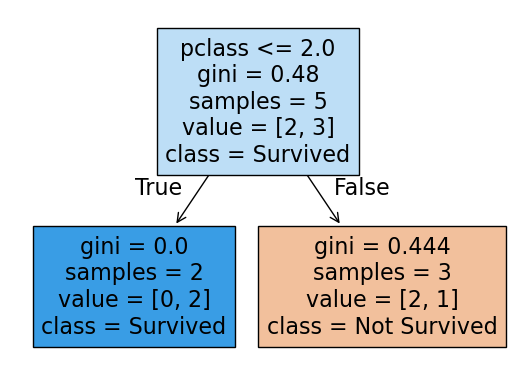

In [11]:


dtree_graph = ''

dtree = DecisionTreeClassifier(max_depth=1)
X = titanic[['age', 'pclass']]
y = titanic['survived']
dtree.fit(X, y)
dtree_graph = plot_tree(dtree, feature_names=['age', 'pclass'], class_names=['Not Survived', 'Survived'], filled=True)

# Answer check
dtree_graph;

### Summary of Exercises

This notebook explored the Gini Impurity criterion used in Decision Trees through a practical example using the Titanic dataset. The exercises covered:

1. **Basic Gini Impurity Calculation**
   - Calculated initial dataset impurity (0.48)
   - Demonstrated how to compute Gini impurity: 1 - P(class1)² - P(class2)²

2. **Split Analysis on Passenger Class**
   - Computed Gini impurity for pclass=1 (0.0) and pclass=3 (0.44)
   - Calculated weighted average impurity (0.267)

3. **Split Analysis on Age**
   - Analyzed split at age < 23
   - Computed impurities for both groups and weighted average (0.3)

4. **Split Comparison**
   - Determined pclass split was superior (0.267 vs 0.3)
   - Demonstrated how to evaluate competing split options

5. **Validation with sklearn**
   - Used DecisionTreeClassifier to confirm manual calculations
   - Visualized the optimal split decision

### Key Takeaways

1. Gini impurity measures node purity (0 = pure, higher values = more impure)
2. Decision tree splits are chosen to minimize weighted average impurity
3. The best split is determined by comparing impurity reduction across all possible splits
4. Manual calculations align with sklearn's DecisionTreeClassifier implementation
5. Practical demonstration of how decision trees make splitting decisions